# Predicting Car Prices



## Introduction to Problem & Data

#### <strong>Problem Statement:</strong> For my final project, I aim to develop a predictive model capable of accurately estimating the prices of different cars and analyzing the trends and patterns within these prices of cars. A large percentage of people end up buying a car at least once in their life, and it is generally a significant and thoughtful purchase. This model may be useful for people buying a car for the price time and wanting to know how much they should pay for it, given a set of feature parameters. These predictions will allow them to make informed financial decisions that optimize their choice, receiving a car that is worth the amount they are paying. The successful development of a model will not only enhance predictive capabilities for car prices but will also empower stakeholders in the car industry with actionable insights. Car salesmen can align their prices with customer preferences, learning what features people are willing to pay more for.

#### Dataset Description:

Data for this project is sourced from Kaggle in csv format, providing comprehensive information about various titles cars with different brands and models. Challenges may arise in constructing an accurate regression model due to the inherent volality of the data due to metrics not monitored, such as location and therefore cost of living. However, I believe that certain predictive variables will be able to at least somewhat predict car prices with some degree of accuracy.

This dataset contains comprehensive information about various cars and their prices, including brand, year, engine size, fuel type, transmission mileage, condition, and model. It contains 8 columns representing their different features and attributes, which I can use to help predict prices.

#### Data Pre-Processing & Preliminary Examination:

In [1]:
# Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()

cars_url = 'car_price_prediction_.csv'
cars = pd.read_csv(cars_url)

Saving car_price_prediction_.csv to car_price_prediction_.csv


In [3]:
cars.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [4]:
cars['Year'].min()

2000

In [5]:
cars['Year'].max()

2023

In [6]:
cars['Mileage'].min()

15

In [7]:
cars['Mileage'].max()

299967

In [8]:
cars['Condition'].value_counts()

,count
Condition,
Used,855
Like New,836
New,809


The dataset that I will be working with contains information for over 2000 cars, produced through years 2000 to 2023. The cars' mileage range in length from 15 to 299967 miles, and can be in a used, like new, or new condiiton.

## Exploratory Data Analysis

In [9]:
cars.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


#### Descriptive Statistics

In [10]:
# mean car price
cars['Price'].mean()

52638.022532

In [11]:
# median car price
cars['Price'].median()

53485.240000000005

In [12]:
# min car price
cars['Price'].min()

5011.27

In [13]:
# max car price
cars['Price'].max()

99982.59

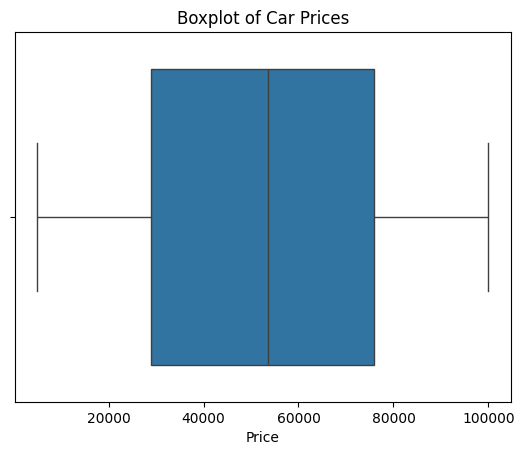

In [14]:
# box & whisker plot of prices
sns.boxplot(data = cars, x = 'Price')
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

#### Initial Visualizations

In [15]:
# Data frame showing the price by model in each job car brand

bm_cars = cars[['Price', 'Brand', 'Model']]
bm_cars = bm_cars.groupby(['Brand', 'Model'], as_index=False).mean()
bm_cars

,Brand,Model,Price
0,Audi,A3,50530.147551
1,Audi,A4,51554.915000
2,Audi,Q5,53432.295949
3,Audi,Q7,52594.554211
4,BMW,3 Series,58561.123548
5,BMW,5 Series,55986.422796
6,BMW,X3,51021.077391
7,BMW,X5,50517.325250
8,Ford,Explorer,52117.953953
9,Ford,Fiesta,51313.160777


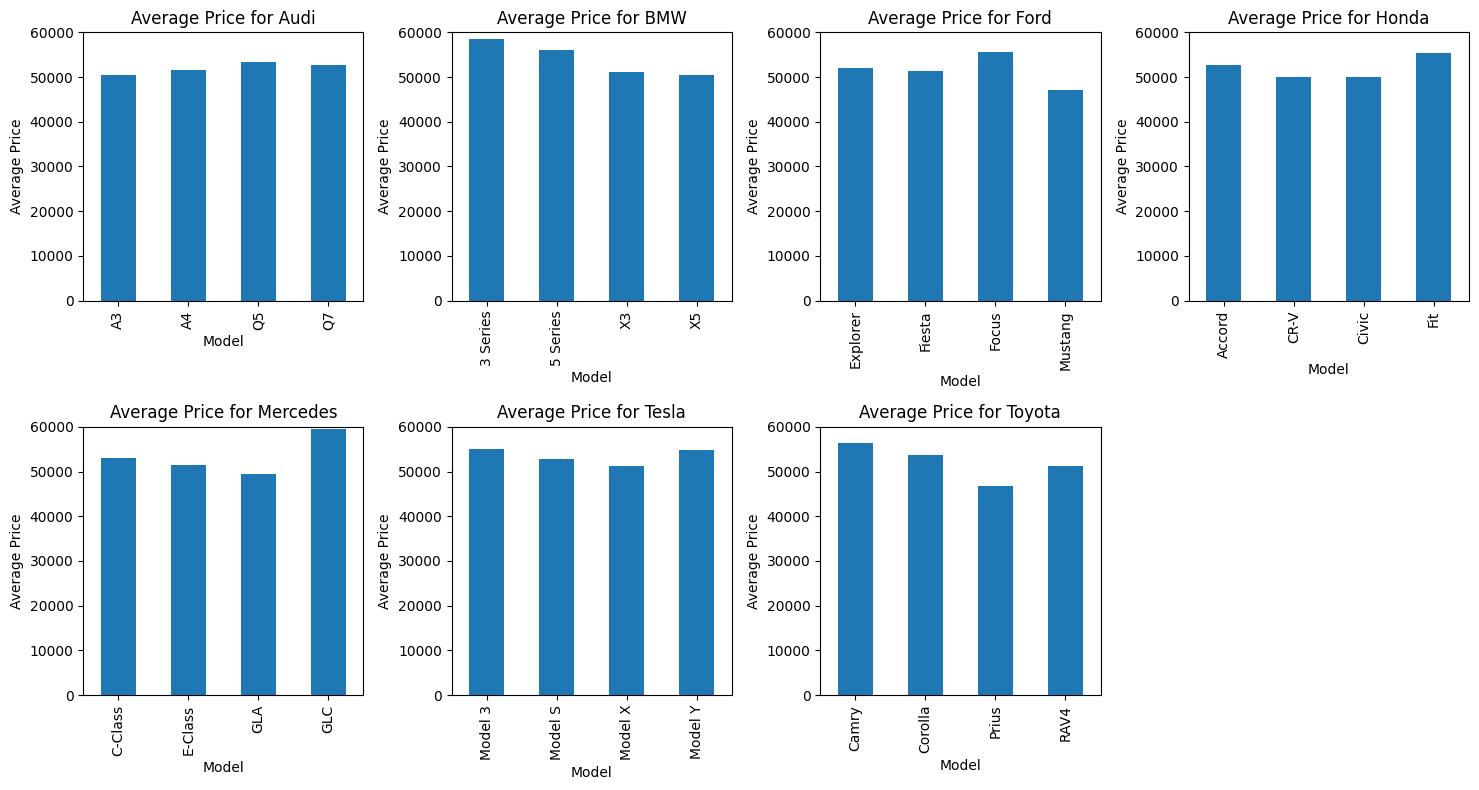

In [16]:
# Create a grid of subplots showing the car prices of each model in every brand
df = bm_cars.copy()

df_pivot = df.pivot(index='Brand', columns='Model', values='Price')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

max_price = df_pivot.max().max()

for i, brand in enumerate(df_pivot.index):
    ax = axes.flat[i]

    brand_data = df_pivot.loc[brand].dropna()

    brand_data.plot(kind='bar', ax=ax)
    ax.set_title(f'Average Price for {brand}')
    ax.set_ylabel('Average Price')
    ax.set_xlabel('Model')

    ax.set_ylim(0, 60000)
    ax.set_yticks(range(0, 61000, 10000))

plt.tight_layout()

for i in range(len(df_pivot.index), 8):
    fig.delaxes(axes.flat[i])

plt.show()

The grid of barplots showcases the average car prices of different models in each car brand. As illustrated above, all of the different brands seem to have similar prices on average. However, it is important to note that <strong>BMW, Mercedes, and Tesla have slightly higher average prices.</strong> This would align with the idea that more luxurious brands like BMW and Mercedes will be more expensive. With Tesla's boost through its electric vehicles, it is also understandable that the brand is in the top three most expensive brands listed here.




Text(0.5, 1.0, 'Car Price by Transmission with Fuel Type Hue')

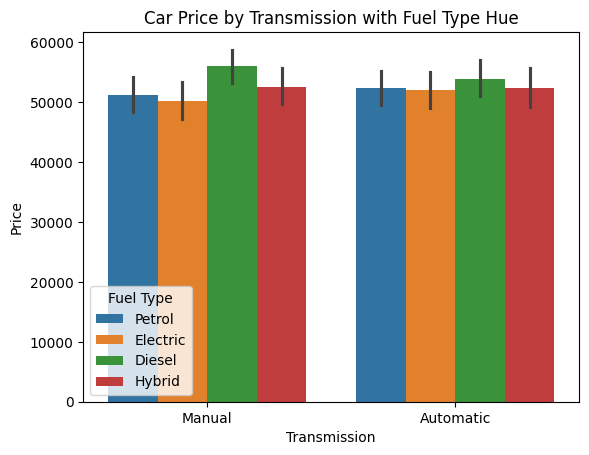

In [17]:
# plot transmission against price with fuel type hue
sns.barplot(data = cars, x = 'Transmission', y = 'Price', hue = 'Fuel Type')
plt.title('Car Price by Transmission with Fuel Type Hue')

In the bar plot above, we see how manual and automatic transmission cars compare to price, with them also being sorted by fuel type. <strong>Diesel fueled cars seem to be the most expensive fuel type,</strong> which agrees with the idea that diesel is better for fuel efficiency and less available than petrol. A lower supply of diesel drives its cost higher, making it more expensive.

<strong>Another point to note is that electric automatic cars seem to be more expensive than electric manual cars.</strong> This can be because combining electric cars with automatic transimissions can be a complex process, and there is higher demand for this style rather than electric manual cars. Meanwhile, electric menual cars are less in demand, however, they might be more affordable, or cheaper.

Text(0.5, 1.0, 'Car Price by Engine Size')

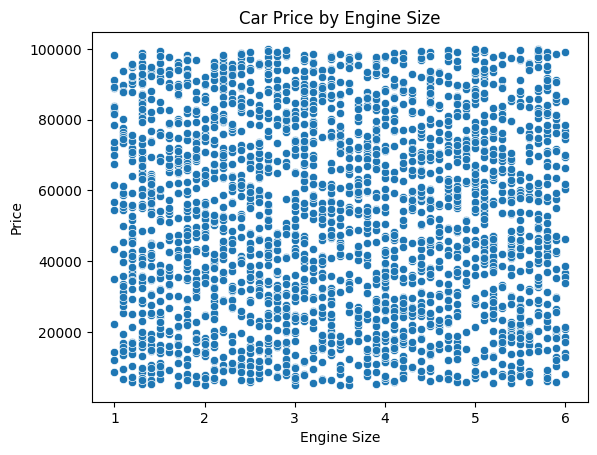

In [18]:
#plot engine size against price
sns.scatterplot(data = cars, x = 'Engine Size', y = 'Price')
plt.title('Car Price by Engine Size')

This scatterplot shows <strong>no correlation between engine size and prices.</strong>

In [19]:
# Finding average year produced and car prices, grouped by condition of car
condition_cars = cars[['Year', 'Condition', 'Price']]
condition_cars = condition_cars.groupby(['Condition'], as_index=False).mean()
condition_cars

,Condition,Year,Price
0,Like New,2011.427033,53518.746376
1,New,2011.911001,51904.509951
2,Used,2011.553216,52470.919076


This table shows the average year produced and average price of cars grouped by the condition of the car. As expected, <strong>cars in a 'New' condition have the highest average year, meaning that they were produced more recently.</strong>

<strong>An interesting deviation from what is expected comes in the form of average prices for the 'New' condition.</strong> While the average price of cars in the condition 'Like New' are higher than used cars, 'New' cars actually have a lower price than both other conditions. This can possibly be due to a bias data set from different locations and therefore different costs of livings.  